In [9]:
import math
import numpy as np
from scipy.special import factorial

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['text.usetex'] = True
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

In [10]:
def find_nearest(array, value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

In [11]:
def partial_factorial(n, d):
    out = n
    for i in range(d-1):
        out *= (n - i)
    return out

In [12]:
def calculate_posterior(n_H, N, f_H, partial=True):

    if not partial:
        return ((((f_H)**n_H) * ((1 - f_H)**(N-n_H)) * factorial(N + 1)) / 
                ( factorial(n_H) * factorial(N-n_H)) ) 
    else:
        return ((((f_H)**n_H) * ((1 - f_H)**(N-n_H)) * partial_factorial(N + 1, n_H)) / 
                ( factorial(n_H) ))

In [13]:
def plot_posterior(n_H, N, f_H):
    
    posterior = calculate_posterior(n_H, N, f_H)
    p_argmax = np.argmax(posterior)
    p_max = np.max(posterior)
    
    p_pred = (n_H + 1) / (N + 2)
    
    fig, ax = plt.subplots()
    ax.plot(f_H, posterior)
    ax.axvline(x=f_H[p_argmax], color='gray', linestyle='--')
    ax.text(f_H[p_argmax]+0.05, p_max, f"$f_H max={f_H[p_argmax]:0.2f}$")
    ax.axvline(x=p_pred, c='#1f77b4', linestyle='--')
    ax.text(p_pred+(p_pred*.45), p_max-(p_max*.3), f"$f_H pred = {p_pred:0.2f}$")
    plt.title(f"$N={N}$, $n_H={n_H}$")
    ax.set_ylabel(r'$P(f_H | N, n_H)$')
    ax.set_xlabel(r'$f_H$')
    ax.set_ylim([0, p_max + (p_max*.2)])
    ax.set_xlim([0, 1.1])
    plt.savefig(f"p2_8/{n_H}_{N}.pdf")
    plt.show()

## Problem 2.8

In [14]:
f_H = np.linspace(0,1, 200)
_n_H = [0, 2,  3,  29]
_N   = [3, 3, 10, 300]

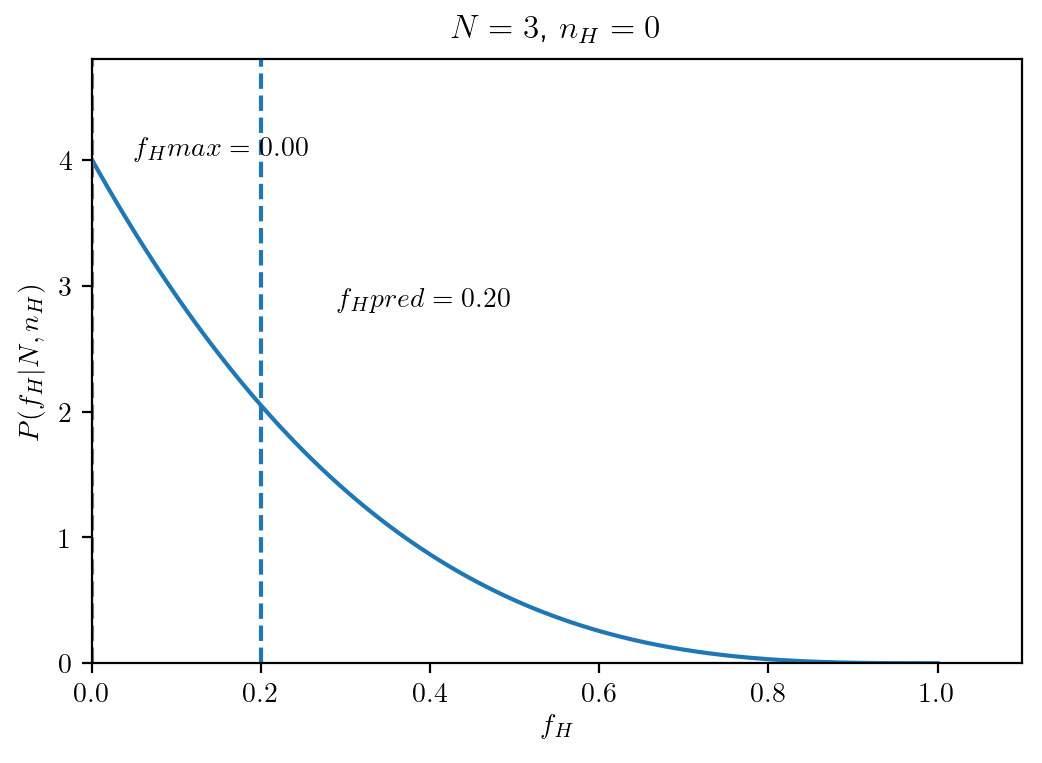

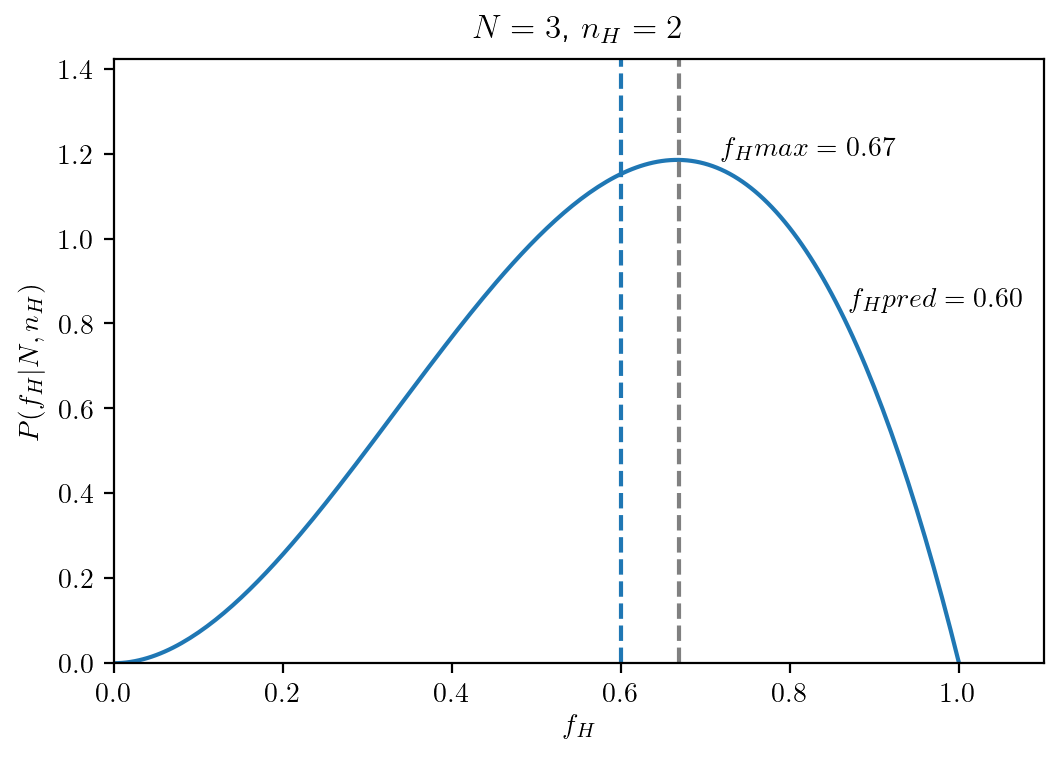

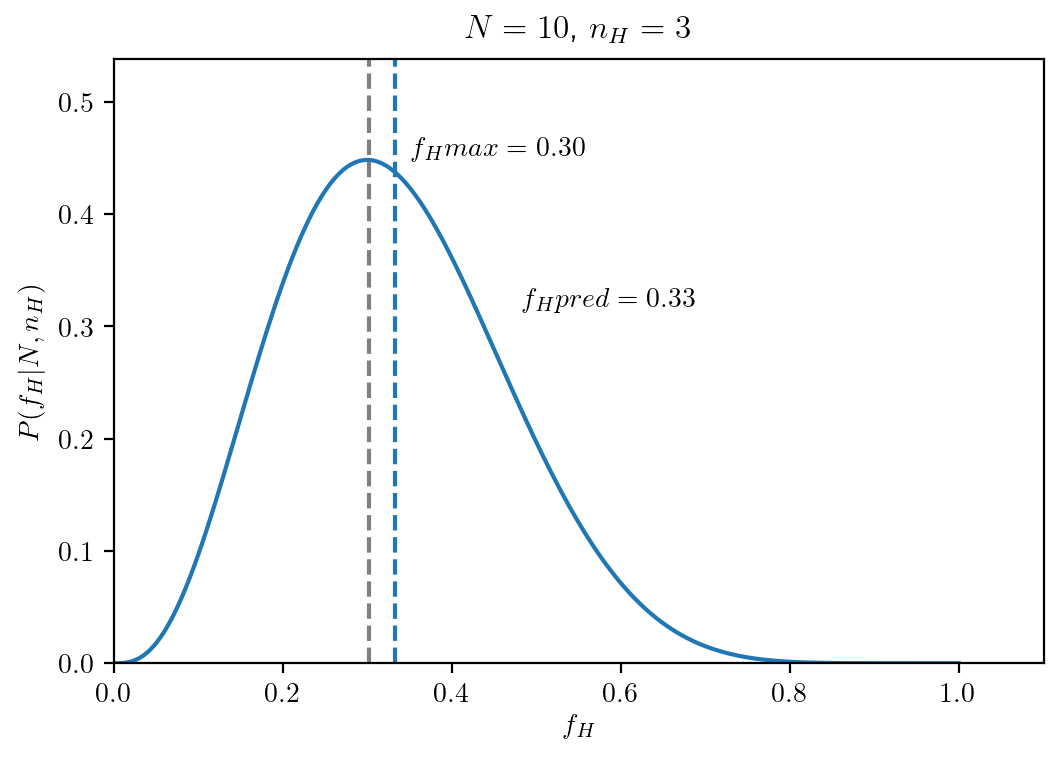

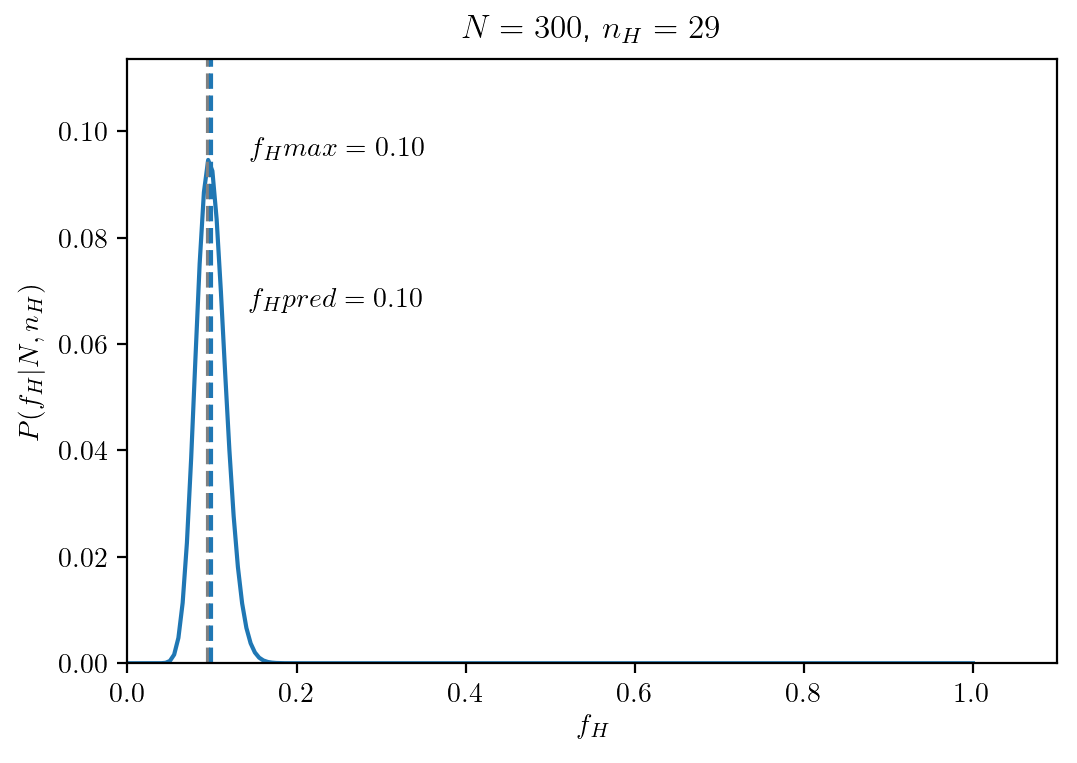

In [15]:
for n_H, N in zip(_n_H, _N):
    plot_posterior(n_H, N, f_H)

## Problem 3.5

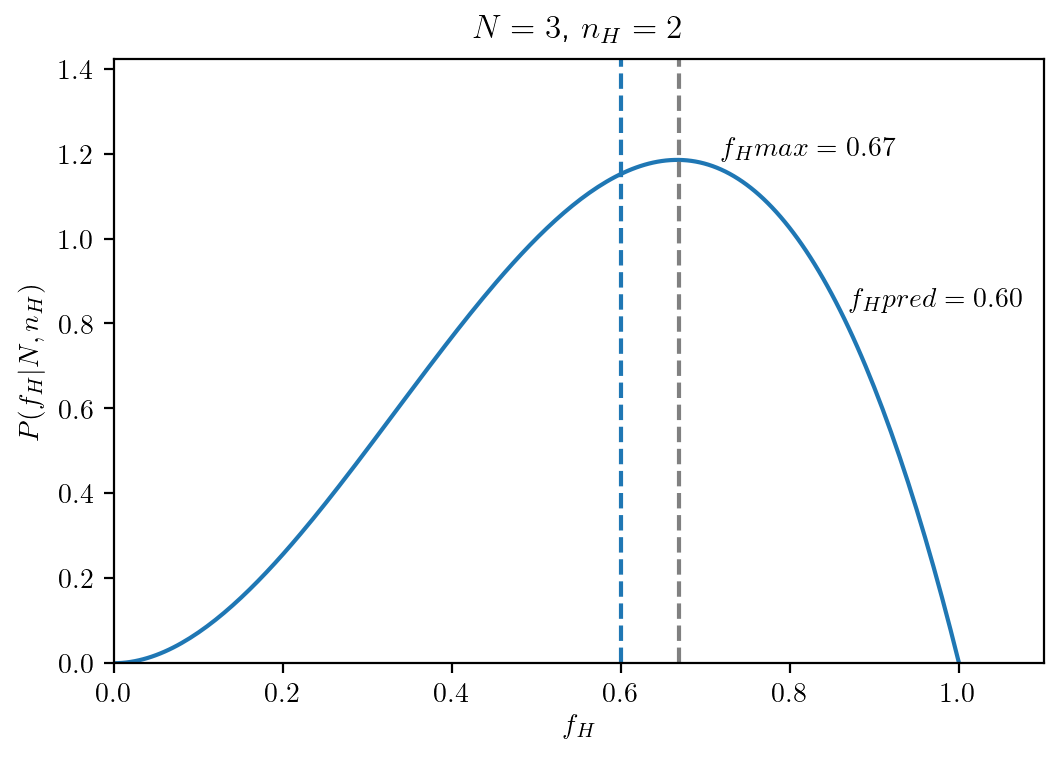

In [19]:
n_a = 2
N = 3
f_H = np.linspace(0,1, 200)
plot_posterior(n_a, N, f_H)